# Data Analysis
2023-March-03, NSYSU, Exp. course 

[lecture homepage](https://github.com/baobabyoo/Lecture_DataAnalysis)

## Importing packages

In [1]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np
from scipy.optimize import curve_fit

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Defining functions

In [2]:
def myline(x, a, b):
    '''
    A function to return y = ax + b
    
    Input:
        x [double] : the x-axis coordinate 
        a [double] : slope of a 1st order polynomial
        b [double] : offset of a 1st order polynomial
        
    Return:
        y [double] : the y-axis value
    '''
    y = a * x + b
    
    return y

def gaussian_1d(x, amp, x0, sigma):
    '''
    Return a Gaussian distribution that is normalized to 1.0
             
    Input:
        x [double]       : offset
        amp [double]     : amplitude
        x0 [double]      : central position of the Gaussian
        sigma [double]   : standard deviation of the Gaussian
            
    Return:
        [double]   : A 1-dim Gaussian function
    '''
    
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    xdiff = x - x0    
    B = -0.5 * (( xdiff/sigma )**2.0)

    return amp * A * np.exp(B)


## 1. Plotting (A look at 1D Gaussian random variable and uniform random variable)

### 1.1 Producing some data to plot

In [3]:
num_x = 300
x = np.arange(num_x)

mu     = 10.0
sigma  = 3.0
y_gaus = np.random.normal(loc=mu, scale=sigma, size=num_x)

low    = -8.0
high   = 2.0
y_unif = np.random.uniform(low=low, high=high, size=num_x)

### 1.2 Plotting data

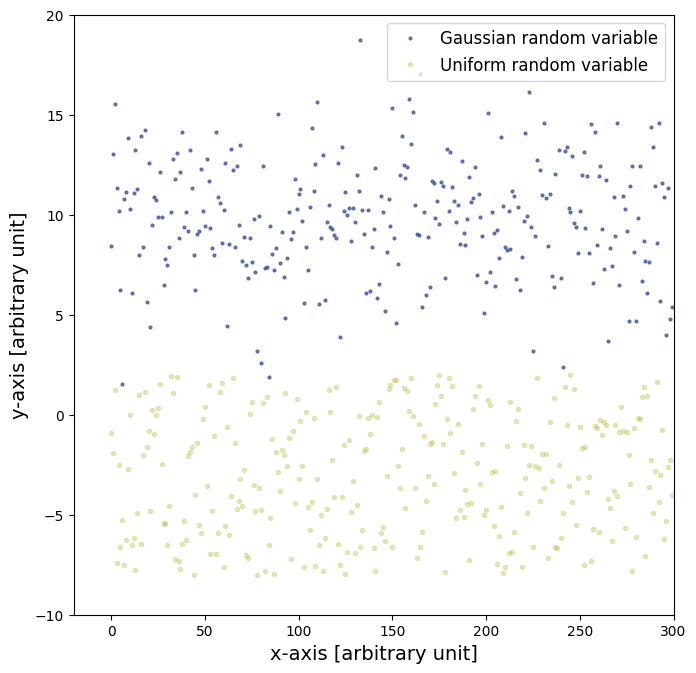

In [4]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(
    x,
    y_gaus,
    'o', # symbol shape
    color=(0.2,0.3,0.6, 0.7), # (R, G, B, transparency), ranged between [0, 1]
    markersize=2, 
    label = "Gaussian random variable"
        )

plt.plot(
    x,
    y_unif,
    'o', # symbol shape
    color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
    markersize=3, 
    label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# Setting the plot range
plt.xlim( (-20, num_x) )
plt.ylim( (-10, 20) )

# PDF file output
plt.savefig('Gaussian_random_xy.pdf', 
            transparent = True
           )

### 1.3 plotting histogram

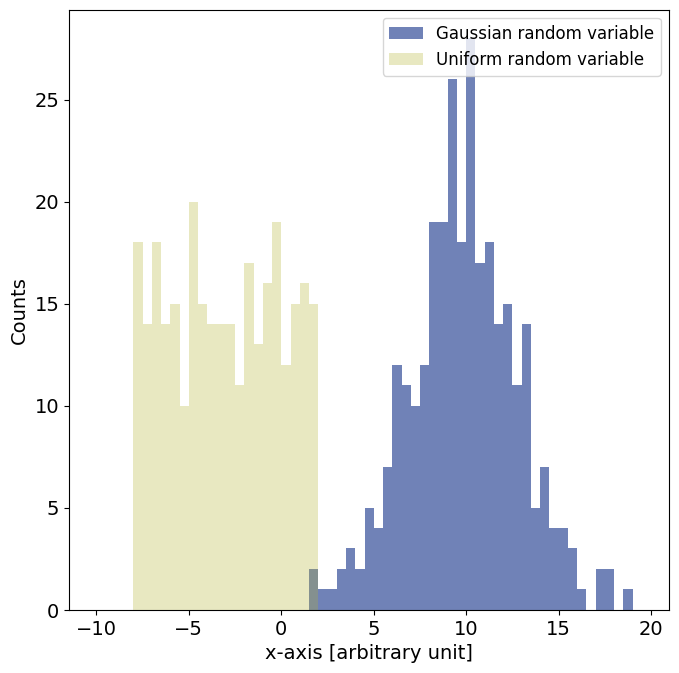

In [5]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(-10, 20, 0.5)


plt.hist(y_gaus, 
         bins=bins, color=(0.2,0.3,0.6, 0.7),
         label = "Gaussian random variable"
        )

plt.hist(y_unif, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('Gaussian_random_histogram.pdf', 
            transparent = True
           )

## 2. Data I/O

### 2.1 Generating data

In [6]:
num_x = num_x
low   = 0
high  = 100
x = np.random.uniform(low=low, high=high, size=num_x)

a       = 10.0
b       = 100.0
sigma_y = 30.0

y_err = np.random.normal(loc=0, scale=sigma_y, size=num_x)
y     = myline(x, a, b) + y_err
print(y)

[ 374.38185207  141.82701495  475.5863117   286.26975698 1040.42138048
  356.94877046  693.9577948   854.85388476  847.52455557  506.58862698
  425.75429814  546.35081129  996.15610802  383.30739043  626.45670258
 1053.89529357 1067.73578878  700.09921722  375.07668795  671.56716276
  518.66864317  852.61626417  646.94839679  524.35224683  165.51487423
  742.46454081  782.64808266  293.81736757  180.1054921   903.10554078
  476.12850734  904.2669846  1095.3529789   894.46999692  715.38390625
  888.6902383   125.10194094  231.88782353  414.13088666  390.01491963
  352.92910976  166.79312224  345.61790724  146.40562278  380.45038807
  369.49117661  214.47355348  843.17014039  825.15246297  439.06921125
  357.64250291  215.91566413 1100.54347172  288.36230871  600.63010138
  580.86777771  150.63580009  785.75515692  418.62158647  687.7083213
  629.60025452  969.36718194  280.47429889  167.24465707  219.63279676
  490.2696821   557.65232806  271.09368165  919.03594752 1069.61145292
  967.3

### 2.2 Standard data output, and data input with numpy.loadtxt

#### 2.2.1 Standard file output

In [7]:
filename = 'data_1dpoly.txt'

# remove the file in case it exist
os.system('rm -rf '+ filename)

# open output file
f = open(filename, "w")

for i in range(0,num_x):
    out_string = str(x[i]) + ' ' + str(y[i]) + ' '  +  str(sigma_y) +'\n' # '\n is a line break'
    f.write(out_string)

# close output file
f.close()

#### 2.2.2 Read space-separated values using numpy.loadtxt method

In [8]:
x, y, y_err = np.loadtxt(filename, 
                  usecols=(0, 1, 2),
                  unpack = True
                 )
print ("##### Loaded x values")
print(x)
print(' ')
print ("##### Loaded y values")
print(y)
print(' ')
print ("##### Loaded y errors")
print(y_err)

##### Loaded x values
[31.62267259  5.8419202  40.8116235  14.31077133 94.31681572 25.38400369
 62.7307974  75.25781859 73.98819758 39.4780684  38.2479857  43.01185293
 91.99809566 28.45030708 49.66968509 98.71936549 97.04095272 59.56151057
 23.94962043 56.88466224 40.32628551 72.73327072 54.52196227 40.60094311
  8.5638881  63.87117823 69.73632209 20.79741883 12.12329667 87.92568899
 34.2589463  82.70148008 94.05117778 76.43676772 68.1879405  84.69235218
  0.52023918 13.16058669 27.36057502 28.17525098 20.32343109  8.88793512
 27.13483072  6.23434945 27.81636087 29.04010249  9.18570501 75.10774743
 70.71165852 33.46754862 25.97926454 14.05136939 95.30893728 17.72090019
 48.00893258 48.53588328  5.53027085 65.54117714 30.29267512 63.1829794
 51.76757761 83.14358806 18.07490697  3.87664336 16.21584902 35.89519867
 44.565789   18.04895892 77.91501068 99.72900123 87.12183134 63.94533135
 15.00499528 15.71357063 53.12460676 24.12990314 40.59433061 35.76549574
 77.85573367 99.26340053 39.25

### 2.3 Data I/O with pandas

#### 2.3.1 Creating a pandas dataframe and output to comma-separated-values files (csv files)

In [9]:
data = {'x': x,
        'y': y,
        'y_err': np.zeros(len(y)) + sigma_y
       }
df = pd.DataFrame(data)
print(df)

filename = 'data_1dpoly.csv'
os.system('rm -rf ' + filename)
df.to_csv(filename, index=False)

             x            y  y_err
0    31.622673   374.381852   30.0
1     5.841920   141.827015   30.0
2    40.811624   475.586312   30.0
3    14.310771   286.269757   30.0
4    94.316816  1040.421380   30.0
..         ...          ...    ...
295  77.910729   878.172650   30.0
296   0.777789   129.684757   30.0
297   5.097407   142.928293   30.0
298  99.739060  1162.732325   30.0
299  52.121589   661.837195   30.0

[300 rows x 3 columns]


### 2.3.2 Reading back the csv file

In [10]:
path = './'
df_read = pd.read_csv(path + filename)

print(df_read)

             x            y  y_err
0    31.622673   374.381852   30.0
1     5.841920   141.827015   30.0
2    40.811624   475.586312   30.0
3    14.310771   286.269757   30.0
4    94.316816  1040.421380   30.0
..         ...          ...    ...
295  77.910729   878.172650   30.0
296   0.777789   129.684757   30.0
297   5.097407   142.928293   30.0
298  99.739060  1162.732325   30.0
299  52.121589   661.837195   30.0

[300 rows x 3 columns]


In [11]:
# examining the read x-values and y-values
print(df_read.x)
print(' ')
print(df_read.y)

0      31.622673
1       5.841920
2      40.811624
3      14.310771
4      94.316816
         ...    
295    77.910729
296     0.777789
297     5.097407
298    99.739060
299    52.121589
Name: x, Length: 300, dtype: float64
 
0       374.381852
1       141.827015
2       475.586312
3       286.269757
4      1040.421380
          ...     
295     878.172650
296     129.684757
297     142.928293
298    1162.732325
299     661.837195
Name: y, Length: 300, dtype: float64


#### 2.3.3 Plotting the loaded data

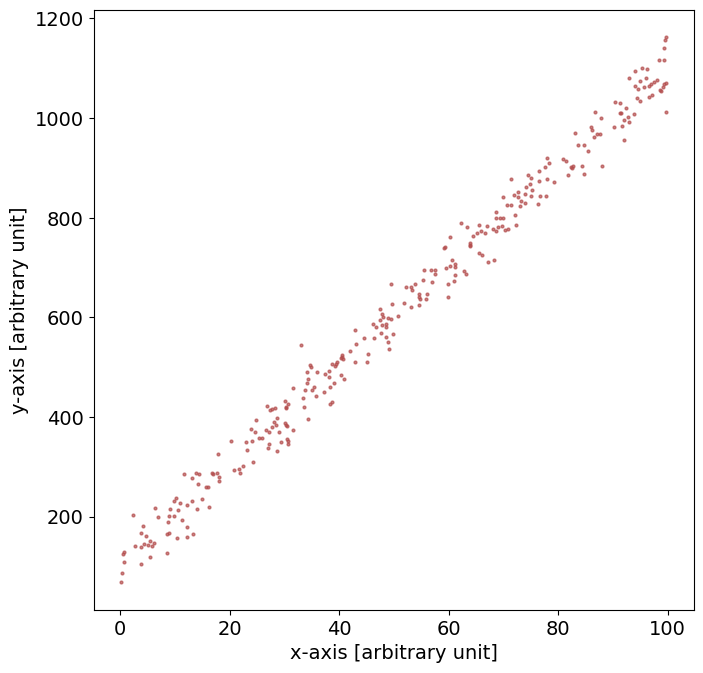

In [12]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )




## 3. Data modeling

### Defining functions

In [13]:
def chisquare(y, y_err, ymodel):
    '''
    Return the chi-square given the measurements of y, y-error, and a model of the measurements y.
    
    Input:
        y [np array]      : measurements
        y_err [np array]  : measurement errors
        ymodel [np array] : a model of y 
    
    Return:
        chisquare [double] : the chi-square value
    
    '''
    
    return np.sum( ( (y - ymodel) / y_err)**2 )

### 3.1 Home made code to fit the 1D polynomial model

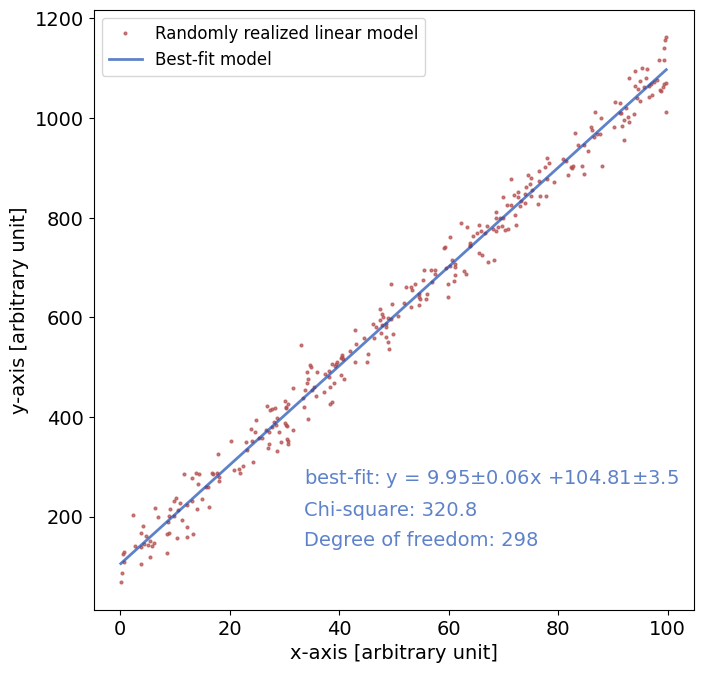

In [14]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# Equations in Section 15.2 (Fitting Data to a straight line) of W. H. Press, Numerical Receipes, 3rd ed.
# Note that the definition of a and b is interchanged.
S = np.sum(
           1.0 / (df_read.y_err**2)
          )
Sx = np.sum(
            df_read.x / (df_read.y_err**2)
           )
Sy = np.sum(
            df_read.y / (df_read.y_err**2)
           )
Sxx = np.sum(
             (df_read.x**2) / (df_read.y_err**2)
            )
Sxy = np.sum(
             (df_read.x*df_read.y) / (df_read.y_err**2)
            )
Delta = S * Sxx - Sx**2

popt = np.zeros(2)
perr = np.zeros(2)

popt[1]     = (Sxx*Sy - Sx*Sxy) / Delta
popt[0]     = (S*Sxy - Sx*Sy)   / Delta

perr[1]     = np.sqrt( Sxx / Delta )
perr[0]     = np.sqrt( S / Delta )

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.35, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.35, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('HM_modeldata_1dpoly.pdf', 
            transparent = True
           )

### 3.2 Scipy fitting of the 1D polynomial model

Best-fit a:  9.949016159163534   Best-fit b:  104.8095170298553
a error:  0.0619996378098453   b error : 3.631343345316032


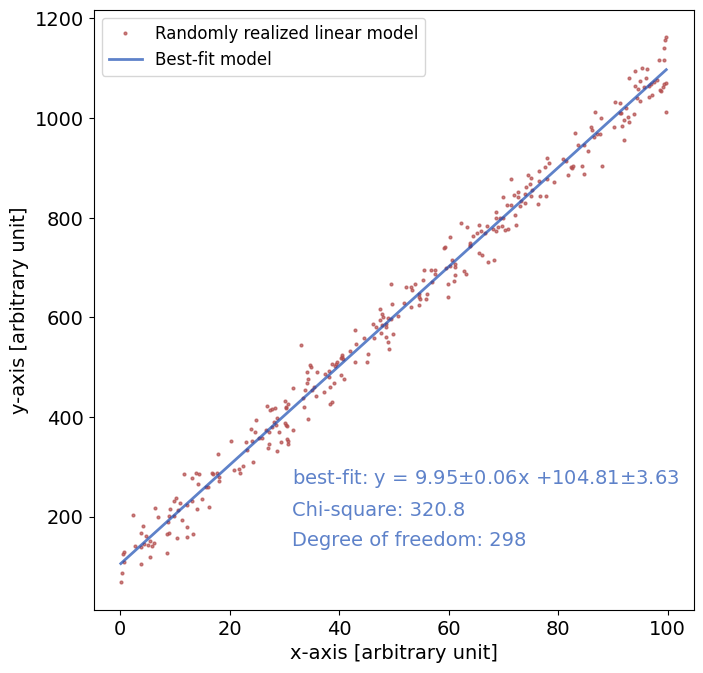

In [15]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                       sigma = df_read.y_err # standard measurement error
                      )

# evaluating the uncertainties of fit parameters from the covariant matrix
perr = np.sqrt(np.diag(pcov))

print('Best-fit a: ', popt[0], '  Best-fit b: ', popt[1])
print('a error: ', perr[0], '  b error :', perr[1])

# plotting data and model

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('log')
#plt.yscale('log')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################


# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])
plt.plot(x_sort, ymodel,
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model"
        )
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, popt[0], popt[1]) )


# text labeling
label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
plt.text(0.33, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
plt.text(0.33, 0.1, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.1 Using bootstraping to estimate the uncertainties of fit parameters and confidence level

In [16]:
# defining a function to include Gaussian random errors in the synthetic model
# (if the error is not Gaussian, you can change the form accordingly)

def adderror(y, y_err):
    '''
    A function to include errors in the synthetic measurements.
    '''
    
    return y + np.random.normal(loc = np.zeros(len(y)), scale = y_err)

In [23]:
# number of bootstraping iterations
num_iter = 5000

# create an array to store the fitting results of synthetic data
chisq_boot = np.zeros(num_iter)
a_boot     = np.zeros(num_iter)
b_boot     = np.zeros(num_iter)

# Obtaining the best-fit parameters
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

popt, pcov = curve_fit(myline, # function that is the model
                       df_read.x, df_read.y, # x and y values of the data
                      )
chi2       = chisquare(df_read.x, df_read.y, myline(df_read.x, popt[0], popt[1]) )


# construct the best-fit model
x_sort = np.sort(df_read.x)
ymodel = myline(x_sort, popt[0], popt[1])

# bootstraping
for i in range(0, num_iter):
    
    # fit the synthetic data
    y_synthetic = adderror(ymodel, df_read.y_err)
    popt_temp, pcov_temp = curve_fit(myline, x_sort, y_synthetic, sigma = df_read.y_err)
    
    # evaluate chi-square
    chi2_temp = chisquare(x_sort, y_synthetic, myline(x_sort, popt_temp[0], popt_temp[1]) )
    
    # store the results
    chisq_boot[i] = chi2_temp
    a_boot[i]     = popt_temp[0]
    b_boot[i]     = popt_temp[1]
    
# evaluate the mean and standard deviations of chi-square and fit parameters
a_mean   = np.mean( a_boot )
a_stddev = np.std( a_boot )
b_mean   = np.mean( b_boot )
b_stddev = np.std( b_boot )

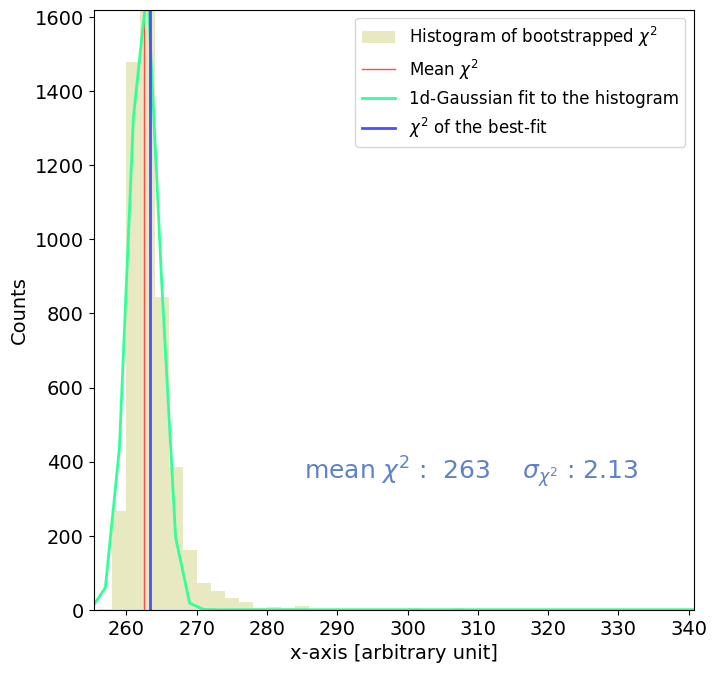

In [24]:
# plotting histograms of the bootstraping results
# chi-square

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

deg_o_f = len(df_read.x) - 2
n_bin   = 100
halfhistwidth = 100
binwidth      = halfhistwidth * 2 / n_bin
bins = np.arange(deg_o_f-halfhistwidth, deg_o_f+halfhistwidth, binwidth)
bin_centers = np.zeros(n_bin - 1)
for i in range(0, n_bin - 1):
    bin_centers[i] = (bins[i] + bins[i+1])/2.0

histogram = plt.hist(chisq_boot, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = r"Histogram of bootstrapped $\chi^{2}$"
        )

# evaluate the mean and standard deviations of chi-square and fit parameters
# using gaussian fittings
bin_centers = np.array(bin_centers)
hist_popt, hist_pcov = curve_fit(gaussian_1d, bin_centers, histogram[0], p0=[1000.0, deg_o_f, 2])
chisq_mean = hist_popt[1]

# plot the mean of bootstrapped chi-square
x_plot = [chisq_mean, chisq_mean]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 1.0,
         color = (1, 0.3, 0.3, 1),
         label = r'Mean $\chi^{2}$'
        )

# plot the 1d-gaussian fittings to the bootstrap results
plt.plot(bin_centers, gaussian_1d(bin_centers, hist_popt[0],hist_popt[1],hist_popt[2]),
         '-', linewidth = 2.0,
         color = (0.2, 1.0, 0.6, 1),
         label = r'1d-Gaussian fit to the histogram'
        )

# text labeling
label_string = r'mean $\chi^{2}$ :  ' + str(round(hist_popt[1])) + '    '
label_string += r'$\sigma_{\chi^{2}}$ : ' + str(round(hist_popt[2] ,2))
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=18)

# plot the chi-square of the best fit
x_plot = [chi2, chi2]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 2.0,
         color = (0.3, 0.3, 1, 1),
         label = r'$\chi^{2}$ of the best-fit'
        )

# set the plot range of y-axis
xlim = (deg_o_f - hist_popt[2]*5, deg_o_f + hist_popt[2]*5)
plt.xlim( (deg_o_f - hist_popt[2]*20, deg_o_f + hist_popt[2]*20) ) 
plt.ylim( (0, np.max(histogram[0]) ) )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly_histogram_chisq.pdf', 
            transparent = True
           )

In [ ]:
# plotting histograms of the bootstraping results
# chi-square

# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(9.5, 12, 0.01)

histogram = plt.hist(a_boot, 
         bins=bins, 
         color=(0.7,0.7,0.2, 0.3),
         label = r"Histogram of bootstrapped parameter: a"
        )

# plot the mean of bootstrapped chi-square
x_plot = [a_mean, a_mean]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 4.0,
         color = (1, 0.3, 0.3, 1),
         label = r'Mean of parameter a'
        )

# plot the chi-square of the best fit
x_plot = [popt[0], popt[0]]
y_plot = [0, 1e5]
plt.plot(x_plot, y_plot,
         '-', linewidth = 2.0,
         color = (0.3, 0.3, 1, 1),
         label = r'Parameter a of the best-fit'
        )


# set the plot range of y-axis
plt.ylim( (0, np.max(histogram[0]) ) )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('scipy_modeldata_1dpoly_histogram_a.pdf', 
            transparent = True
           )

### 3.3 MCMC fitting of the 1D polynomial model
y = ax + b

In [ ]:
# importing the package for MCMC fittings
import emcee, corner

In [ ]:
# allow using multiple processors
from multiprocessing import Pool
from multiprocessing import cpu_count

num_cpu = cpu_count()
print("You have {0} Processors".format(num_cpu))

#### 3.3.1 Definining functions that are required in the MCMC model fittings

In [ ]:
def log_prior(parms):
    '''
    Here is basically flat priors over the range [-1e10, 1e10] for both parameters.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        
    Return:
        prob [double] : logged "prior" probability
    '''
    a, b = parms
    if (-1e10 < a < 1e10) and \
       (-1e10 < b < 1e10):
        return 0.0
    
    return -np.inf


def log_likelihood(parms, x, y, y_err):
    '''
    This is the likelihood function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    a, b  = parms
    ymodel = myline(x, a, b)
    
    ln_likelihood = -0.5 * chisquare(y, y_err, ymodel)
    
    return ln_likelihood


def log_probability(parms, x, y, yerr):
    '''
    This is the log probability function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    
    lp = log_prior(parms)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(parms, x, y, yerr)

#### 3.3.2 Doing the MCMC fittings
check [this page](https://emcee.readthedocs.io/en/stable/tutorials/parallel/) for how to parallelize this part.

In [ ]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 16    # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 1000 # number of steps
step_to_discard = 100  # number of steps to be discarded

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# initializing the emcee samplers
sampler = emcee.EnsembleSampler(
                                nwalkers, ndim, log_probability, 
                                args=(df_read.x, df_read.y, df_read.y_err)
                                )


# advancing the emcee samplers
sampler.run_mcmc(
                 pos, nsteps, progress = True
                )

#### 3.3.3 Plotting saplers

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
num_samples = len(samples)

labels = ["a", "b"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(
            samples[:, :, i], 
            "k", 
            alpha=0.3
           )
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

# Setting plotting ranges
ax.set_xlim(step_to_discard, num_samples)
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 200)

# PDF file output
plt.savefig('emcee_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.4 Making corner plot

In [ ]:
import corner

flat_samples = sampler.get_chain(
                                 discard = step_to_discard, 
                                 #thin = 15, 
                                 flat = True
                                )

fig = corner.corner(
                    flat_samples, labels = labels, truths=[a, b]
                   )

# PDF file output
plt.savefig('emcee_corner_1dpoly.pdf', 
            transparent = True
           )

#### 3.3.5 Summarizing the results of MCMC fittings

In [ ]:
mcmc_a = np.percentile(flat_samples[:, 0], [16, 50, 84])
q      = np.diff(mcmc_a)
print('a value is: ' + str(round(mcmc_a[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

mcmc_b = np.percentile(flat_samples[:, 1], [16, 50, 84])
q      = np.diff(mcmc_b)
print('b value is: ' + str(round(mcmc_b[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

#### 3.3.6 Plotting the MCMC fitting results

In [ ]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# label chi-square
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, mcmc_a[1], mcmc_b[1] ) )
label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
plt.plot(x_sort, myline(x_sort, mcmc_a[1], mcmc_b[1]),
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model with MCMC"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(mcmc_a[1], 2) ) + 'x' + \
                              ' +' + str( round(mcmc_b[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('MCMC_modeldata_1dpoly.pdf', 
            transparent = True
           )